In [0]:
import sys
import matplotlib
import pandas as pd
import seaborn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
import seaborn as sns

In [0]:
# For loading the data
uploading = files.upload()
game_data = pd.read_csv('games.csv')

In [0]:
# For printing the shape and also the name of columns
print(game_data.shape)
print(game_data.columns)

(81312, 20)
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


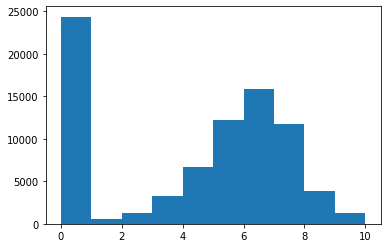

In [0]:
# For making and displaying histogram of the ratings present in average_rating column
result = plt.hist(game_data['average_rating'])


In [0]:
# Now we need to print the first row of all the games with scores greater than zero as well as zero scores
print('Games with score more than 0')
print(game_data[game_data['average_rating'] >0 ].iloc[0]) #first column
print('Games with score equal to 0')
print(game_data[game_data['average_rating'] == 0].iloc[0])

Games with score more than 0
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object
Games with score equal to 0
id                             318
type                     boardgame
name      

In [0]:
# For removing rows with missing values in data
game_data = game_data.dropna(axis =0)

# For removing rows for no user reviews
game_data = game_data[game_data['users_rated'] > 0]

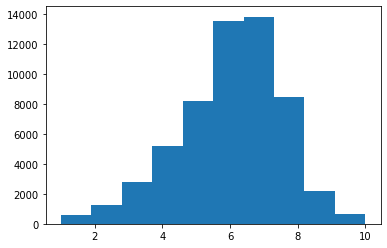

In [21]:
#Now again making histogram of average_rating after removing those rows
result = plt.hist(game_data['average_rating'])

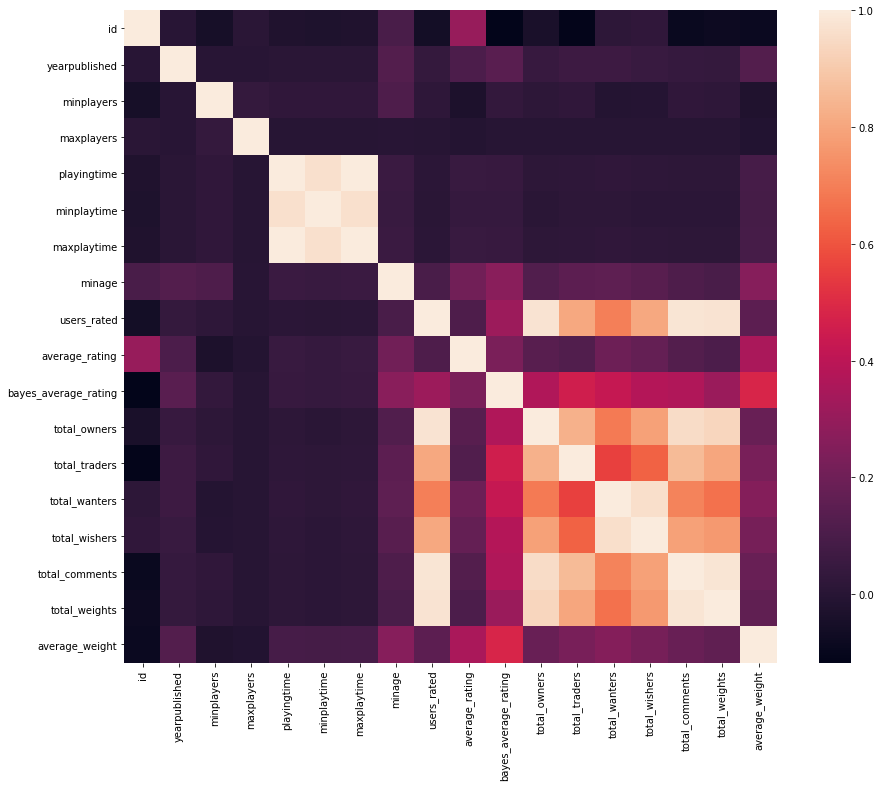

In [0]:
# Now making the correlation matric
correlation_matrix =  game_data.corr()
figure = plt.figure(figsize = (15, 12))
# Making heatmap using the correlation matrix made above
sns.heatmap(correlation_matrix, vmax = 1.0 , square = True)
plt.show()

In [0]:
# Fetch all dataframe columns and filter them to remove unwanted data and also store the target variable on which prediction is done
col = game_data.columns.tolist()
col = [ i for i in col if i not in ['id', 'name', 'type', 'average_rating', 'bayes_average1_rating']]
our_target = 'average_rating'

In [20]:
# Now generating test & training datasets and then generating training set
from sklearn.model_selection import train_test_split
train_data = game_data.sample(frac = 0.8, random_state = 1) #random state to replicate the results 

# Putting randomly selected data for testing which is not present in the training data
test_data = game_data.loc[~game_data.index.isin(train_data.index)]

# To check if our data is divided appropriately we will print the shapes of training and testing data
print(train_data.shape)
print(test_data.shape)

(45515, 20)
(11379, 20)


In [23]:
# Now we will import mean square error reporter and linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Now initializing model class and then fitting model for training data
LinearReg = LinearRegression() 
LinearReg.fit(train_data[col], train_data[our_target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Now we will generate predictions for the test_data set and then compute error between actual values and the test predicted values using mean_squared_error 
test_predictions = LinearReg.predict(test_data[col])
mean_squared_error(test_predictions, test_data[our_target])

2.0789874864728817

In [25]:
# We will import Random Forest Regressor model, initialize it, fit it to the data.
from sklearn.ensemble import RandomForestRegressor

RandomForestReg = RandomForestRegressor(n_estimators = 150, min_samples_leaf = 10, bootstrap = True, random_state = 1, verbose = 0)

RandomForestReg.fit(train_data[col], train_data[our_target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [26]:
# Now we will generate predictions for the test_data set and then compute error between actual values and the test predicted values using mean_squared_error 
test_predictions = RandomForestReg.predict(test_data[col])
mean_squared_error(test_predictions, test_data[our_target])

1.3997819611108409

In [27]:
# Our calculated mean_squared_error is less in Random Forest Regressor model, so it is better one to choose for predict our rating but we are using both for predicting the rating.
LR_game_rating = LinearReg.predict(test_data[col].iloc[0].values.reshape(1, -1))
RFR_game_rating = RandomForestReg.predict(test_data[col].iloc[0].values.reshape(1, -1))

#Linear Regression rating predictions
print(LR_game_rating)

#Random Forest Regression rating predictions
print(RFR_game_rating)

[8.14577287]
[8.09951784]


In [31]:
test_data[our_target].iloc[0]

8.07933

It shows that the Random Forest Regressor model shows better accuracy in predicting the rating as compared to Linear Regression model since its predicted value is more closer to the calculated value.